In [20]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# For reproducibility
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')


In [21]:
import pmdarima

#from pmdarima import auto_arima


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [9]:
# Load TSLA data from YFinance
ticker = 'TSLA'
start_date = '2015-01-01'
end_date = '2024-10-31'
tsla_data = yf.download(ticker, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed


In [10]:
tsla_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [11]:
tsla_data.to_csv('../data/raw/tesla_raw_data.csv')

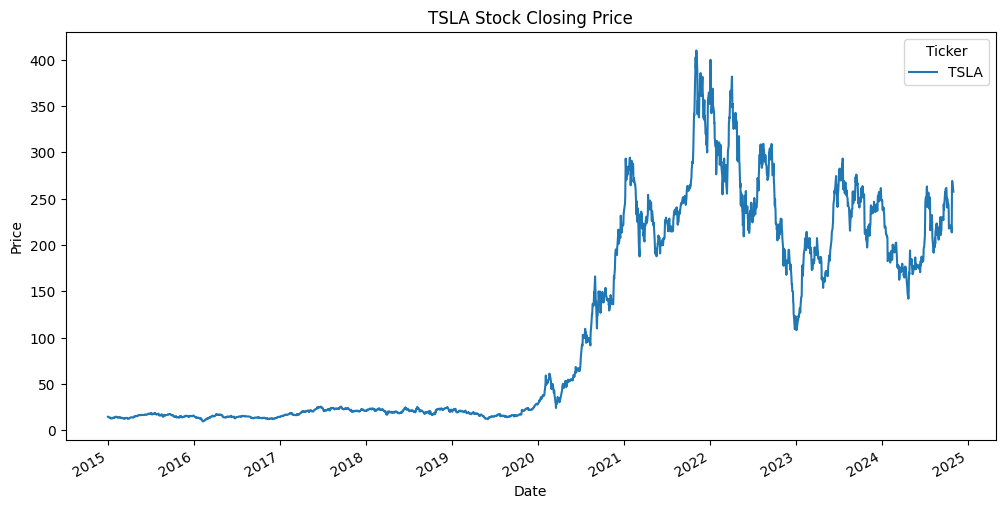

In [12]:
# Inspect data
tsla_data['Close'].plot(figsize=(12, 6), title=f"{ticker} Stock Closing Price", xlabel='Date', ylabel='Price')
plt.show()

In [13]:
# Check for missing values
print(tsla_data.isnull().sum())

# Fill missing values (if any)
tsla_data.fillna(method='ffill', inplace=True)

# Extract 'Close' prices and scale (if necessary for LSTM)
close_prices = tsla_data['Close']


Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_18436\2545457109.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data.fillna(method='ffill', inplace=True)


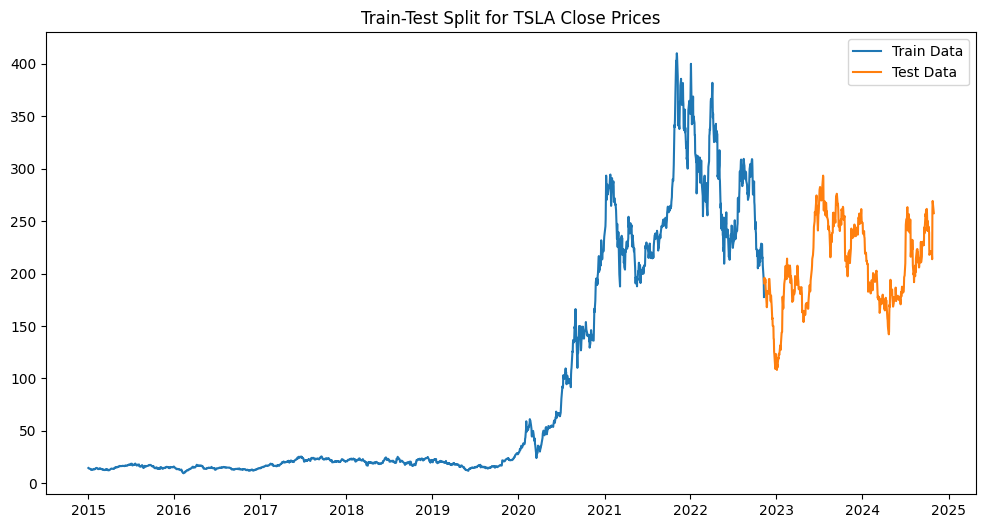

In [14]:
# Define the split ratio
split_ratio = 0.8
train_size = int(len(close_prices) * split_ratio)

# Split the data
train, test = close_prices[:train_size], close_prices[train_size:]
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.legend()
plt.title("Train-Test Split for TSLA Close Prices")
plt.show()


In [ ]:
# Automatically find the optimal ARIMA (p, d, q) parameters using auto_arima
arima_model = auto_arima(train, seasonal=False, trace=True)
print(f"Optimal (p, d, q) parameters: {arima_model.order}")

# Fit the ARIMA model
model_arima = ARIMA(train, order=arima_model.order)
model_arima_fit = model_arima.fit()

# Forecast for the test period
arima_forecast = model_arima_fit.forecast(steps=len(test))

# Plot the forecast against the actual prices
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual Prices')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='orange')
plt.legend()
plt.title("ARIMA Model Forecast vs Actual")
plt.show()
